# Spotiflow: training your own model

Let's first load all the libraries we're gonna need to detect spots in our images.

In [25]:
from spotiflow.model import Spotiflow, SpotiflowModelConfig, SpotiflowTrainingConfig
from spotiflow.sample_data import load_dataset
from spotiflow.utils import get_data

import matplotlib.pyplot as plt
import numpy as np

Let's first load our dataset. We will use one of the training datasets of the paper, corresponding to the `Synthetic (complex)` dataset (which is a good starting point if you want to then fine-tune on your own data). If you have your own annotated data, you can load it and store it in six different variables corresponding to the training images and spots, to the validation images and spots and to the test images and spots. You can use the `load_data()` function to that end (please [see the docs (FIXME)](FIXME) to check the data format that the function allows).

In [ ]:
trX, trY, valX, valY, testX, testY = load_dataset("synth_complex", include_test=True)
# trX, trY, valX, valY, testX, testY = get_data("/FOLDER/WITH/DATA", include_test=True)

The first two variables should contain the training images and annotations, while the latter the validation ones. Let's define a function that will help us visualize them together. 

In [39]:
def plot_image_with_spots(img, spots, title=None, pred=False):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    clim = tuple(np.percentile(img, (1, 99.8)))
    axs.flat[0].imshow(img, clim=clim, cmap="gray")
    axs.flat[1].imshow(img, clim=clim, cmap="gray")
    axs.flat[1].scatter(spots[:,1], spots[:,0], facecolors='none', edgecolors='orange')
    
    axs.flat[0].axis("off")
    axs.flat[1].axis("off")
    if isinstance(title, str):
        title_subp0 = f"{title}"
        title_subp1 = f"{title} (w/ {'annotation' if not pred else 'prediction'})"
        axs.flat[0].set_title(title_subp0)
        axs.flat[1].set_title(title_subp1)
    return

We can now visualize the images with their annotations. These are the first two images of the training dataset (change the indices to see others!): 

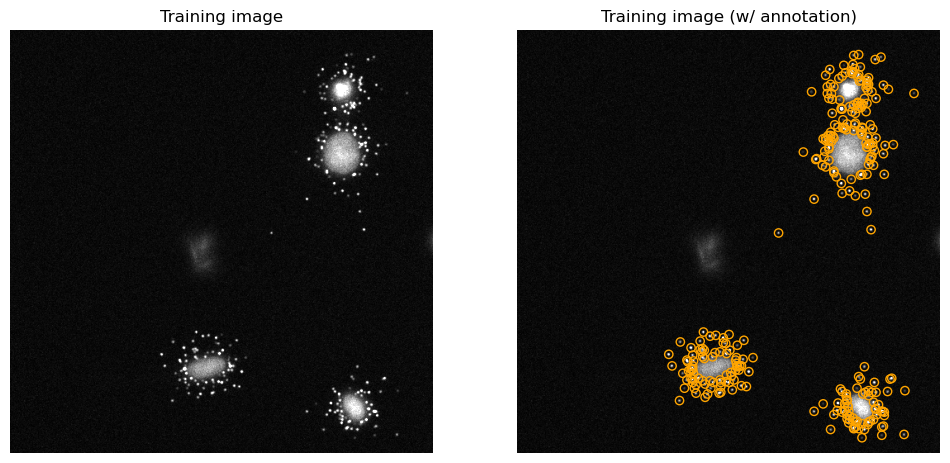

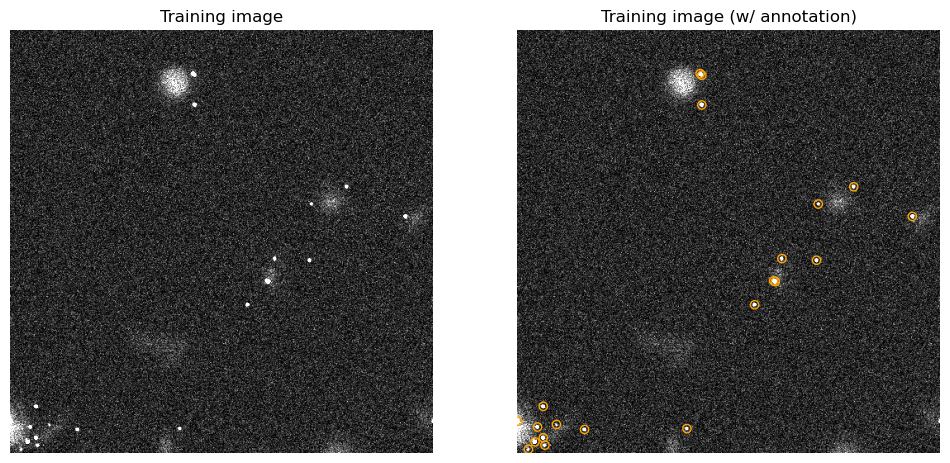

In [40]:
plot_image_with_spots(trX[0], trY[0], title="Training image")
plot_image_with_spots(trX[1], trY[1], title="Training image")

And here are the last two images of the validation dataset:

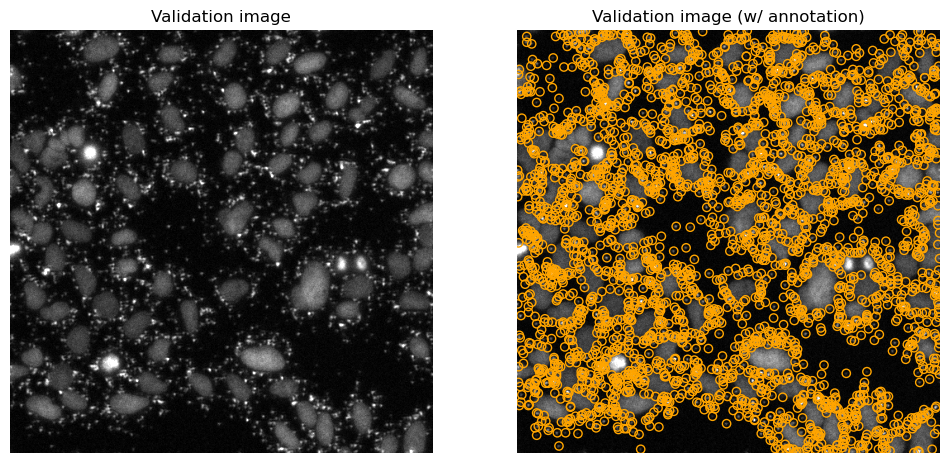

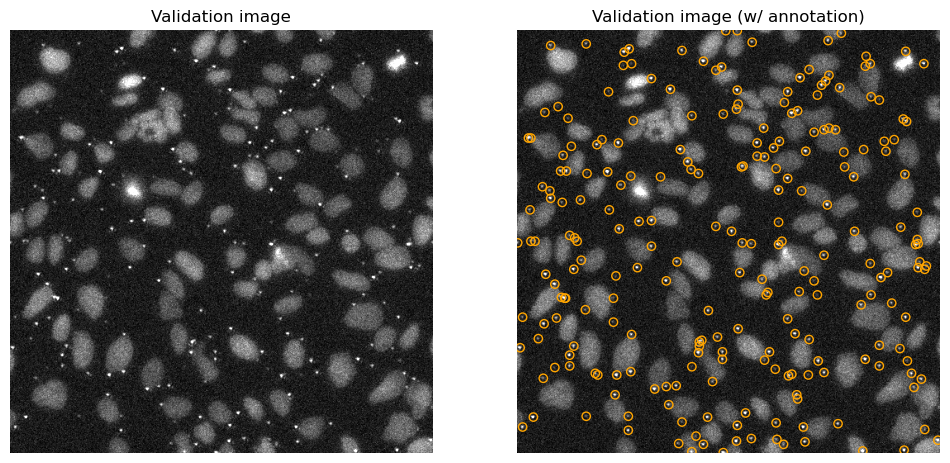

In [41]:
plot_image_with_spots(valX[-2], valY[-2], title="Validation image")
plot_image_with_spots(valX[-1], valY[-1], title="Validation image")

The images and the corresponding annotations look good, so we can now train our own Spotiflow model on this data! Training with the default model configuration is very straightforward. First we need to instantiate the model:

In [11]:
model = Spotiflow()

INFO:spotiflow.model.spotiflow:No model config given, using default.
INFO:spotiflow.model.spotiflow:Default model config: SpotiflowModelConfig(
	backbone=unet
	background_remover=False
	batch_norm=True
	compute_flow=True
	downsample_factor=2
	downsample_factors=((2, 2), (2, 2), (2, 2), (2, 2))
	dropout=0.0
	fmap_inc_factor=2
	in_channels=1
	initial_fmaps=32
	kernel_sizes=((3, 3), (3, 3), (3, 3))
	levels=4
	mode=slim
	n_convs_per_level=3
	out_channels=1
	padding=1
	sigma=1.0
)


Notice that the config is populated with the default values. If you want to change some of the parameters, you can uncomment the following block and change the parameters accordingly (for more information, check [the documentation FIXME](FIXME)):

In [19]:
# config = SpotiflowModelConfig(
#     in_channels=3, # e.g. for RGB
#     sigma=5., # for larger spots
# )
# model = Spotiflow(config=config)

We can now train the model with calling `.fit()` after setting where we want the model to be stored. Again, you will notice that a training configuration is automatically populated. If you want to change some values (_e.g._ the number of epochs), simply uncomment the lines and change the parameters accordingly (for more information, check [the documentation FIXME](FIXME)):

In [45]:
save_folder = "models/synth_complex" # change to where you want to store the model
# train_config = SpotiflowTrainingConfig(
#     num_epochs=2, # very small number of epochs for debugging purposes
# )
model.fit(
    trX,
    trY,
    valX,
    valY,
    save_dir=save_folder,
    # train_config=train_config,
)

INFO:spotiflow.model.spotiflow:Training config is: SpotiflowTrainingConfig(
	batch_size=4
	crop_size=512
	early_stopping_patience=0
	finetuned_from=None
	flow_loss_f=l1
	heatmap_loss_f=bce
	loss_levels=None
	lr=0.0003
	lr_reduce_patience=10
	num_epochs=2
	num_train_samples=None
	optimizer=adamw
	pos_weight=10.0
	smart_crop=False
)


Normalizing images:   0%|          | 0/300 [00:00<?, ?it/s]

Normalizing images:   0%|          | 0/20 [00:00<?, ?it/s]

INFO: GPU available: True (mps), used: True


INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (mps), used: True


INFO: TPU available: False, using: 0 TPU cores


INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores


INFO: IPU available: False, using: 0 IPUs


INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs


INFO: HPU available: False, using: 0 HPUs


INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:spotiflow.model.trainer:Creating logdir models/synth_complex and saving training config...


INFO: 
  | Name            | Type      | Params
----------------------------------------------
0 | model           | Spotiflow | 11.8 M
1 | _flow_loss_func | L1Loss    | 0     
----------------------------------------------
11.8 M    Trainable params
0         Non-trainable params
11.8 M    Total params
47.304    Total estimated model params size (MB)


INFO:lightning.pytorch.callbacks.model_summary:
  | Name            | Type      | Params
----------------------------------------------
0 | model           | Spotiflow | 11.8 M
1 | _flow_loss_func | L1Loss    | 0     
----------------------------------------------
11.8 M    Trainable params
0         Non-trainable params
11.8 M    Total params
47.304    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:spotiflow.model.trainer:Saved best model with val_loss=1.082.


Validation: 0it [00:00, ?it/s]

INFO:spotiflow.model.trainer:Saved best model with val_loss=1.073.


INFO: `Trainer.fit` stopped: `max_epochs=2` reached.


INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=2` reached.
INFO:spotiflow.model.spotiflow:Will use device: mps:0


optimizing threshold:   0%|          | 0/11 [00:00<?, ?it/s]

optimizing threshold:   0%|          | 0/11 [00:00<?, ?it/s]

INFO:spotiflow.model.spotiflow:Best threshold: 0.508
INFO:spotiflow.model.spotiflow:Best F1-score: 0.879
INFO:spotiflow.model.trainer:Saved last model with optimized thresholds.
INFO:spotiflow.model.spotiflow:Will use device: mps:0


optimizing threshold:   0%|          | 0/11 [00:00<?, ?it/s]

optimizing threshold:   0%|          | 0/11 [00:00<?, ?it/s]

INFO:spotiflow.model.spotiflow:Best threshold: 0.508
INFO:spotiflow.model.spotiflow:Best F1-score: 0.879
INFO:spotiflow.model.trainer:Saved best model with optimized thresholds.
INFO:spotiflow.model.spotiflow:Training finished.


Our model is now ready to be used! Let's first check the save folder to make sure the model was stored properly (there should be two `.pt` files (`best.pt` and `last.pt`) as well as three `.yaml` configuration files.)

In [48]:
!ls $save_folder

best.pt           last.pt           thresholds.yaml
config.yaml       lightning_logs    train_config.yaml


We can also quickly predict on a test image which was not seen during training (see [the inference notebook](./2_inference.ipynb) for more information about predicting as well as model loading): 

INFO:spotiflow.model.spotiflow:Will use device: cpu
INFO:spotiflow.model.spotiflow:Predicting with prob_thresh = 0.508, min_distance = 1
INFO:spotiflow.model.spotiflow:Padding to shape (512, 512, 1)
INFO:spotiflow.model.spotiflow:Found 649 spots


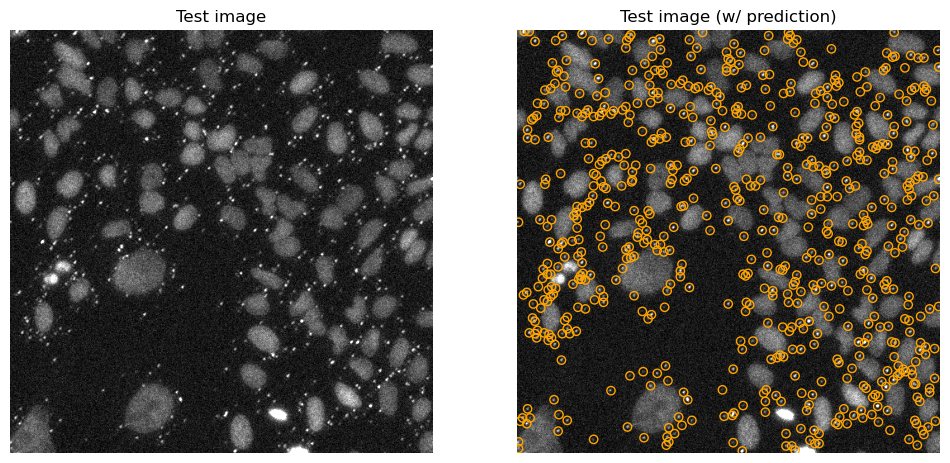

In [49]:
test_pred, _ = model.predict(testX[0])

plot_image_with_spots(testX[0], test_pred, title="Test image", pred=True)

This notebook shows the most user-friendly way to train models. If you want to dive deeper into the model architecture and tweak the code and you are already comfortable with training DL models, please check [the documentation FIXME](FIXME) to get started.